In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [8]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

Text(0.5, 1.0, 'Count of target variable')

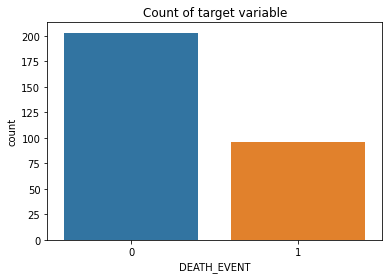

In [11]:
sns.countplot(df["DEATH_EVENT"])
plt.title("Count of target variable")

Text(0.5, 1.0, 'Correlation Heat-Map')

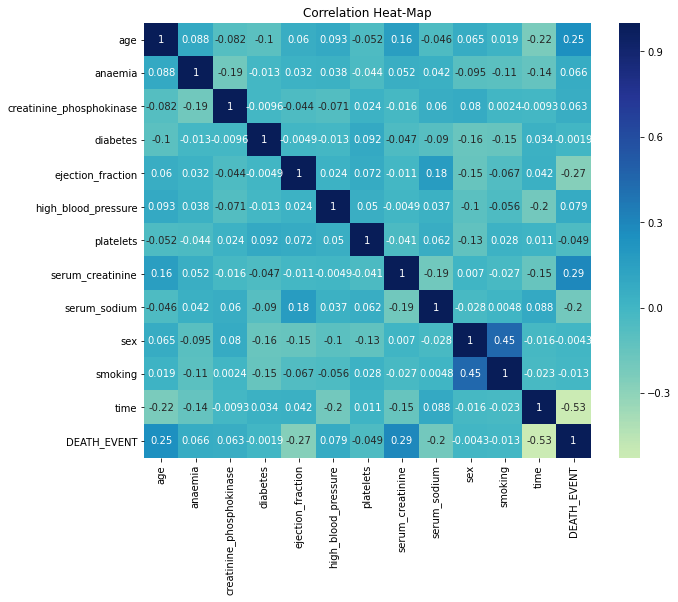

In [12]:
plt.figure(figsize=(10,8)),
sns.heatmap(df.corr(),annot=True,center=0,  cmap="YlGnBu")
plt.title("Correlation Heat-Map")

In [13]:
df['time'].value_counts()

187    7
250    7
186    6
107    6
10     6
      ..
135    1
140    1
148    1
150    1
4      1
Name: time, Length: 148, dtype: int64

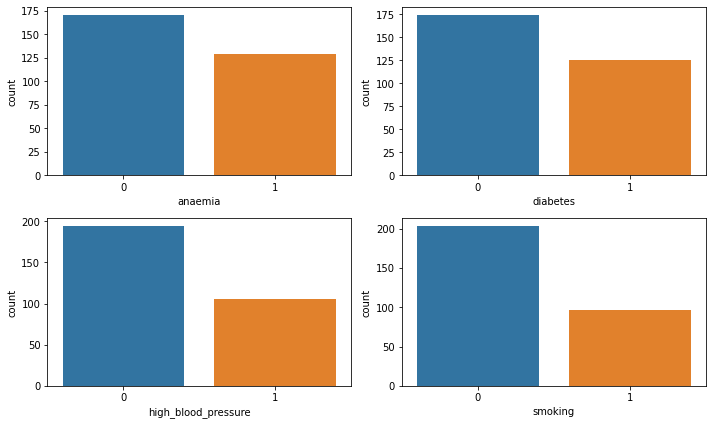

In [14]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
sns.countplot(df["anaemia"])

plt.subplot(2, 2, 2)
sns.countplot(df["diabetes"])

plt.subplot(2, 2, 3)
sns.countplot(df["high_blood_pressure"])

plt.subplot(2, 2, 4)
sns.countplot(df["smoking"])

plt.tight_layout()
plt.show()

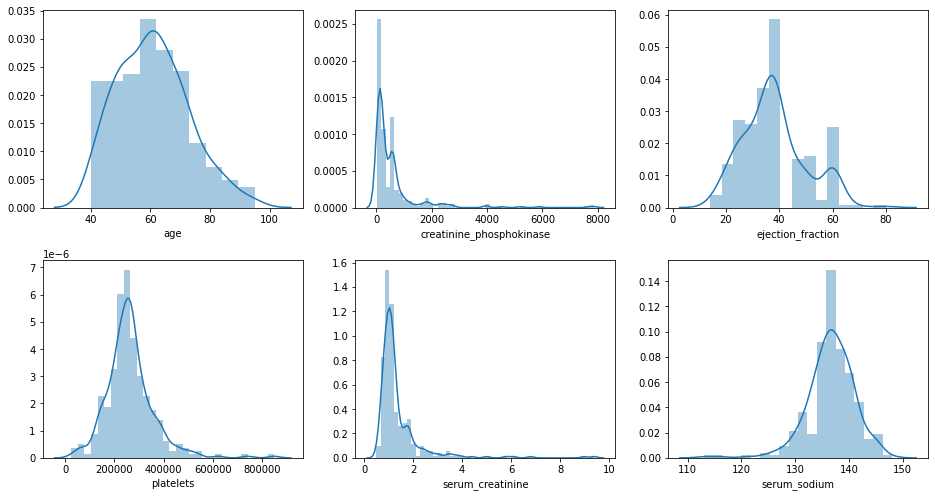

In [15]:
fig = plt.figure(figsize=(13,10))

plt.subplot(3, 3, 1)
sns.distplot(df["age"])

plt.subplot(3, 3, 2)
sns.distplot(df["creatinine_phosphokinase"])

plt.subplot(3, 3, 3)
sns.distplot(df["ejection_fraction"])

plt.subplot(3, 3, 4)
sns.distplot(df["platelets"])

plt.subplot(3, 3, 5)
sns.distplot(df["serum_creatinine"])

plt.subplot(3, 3, 6)
sns.distplot(df["serum_sodium"])

plt.tight_layout()
plt.show()

In [16]:
# sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='serum_sodium'>

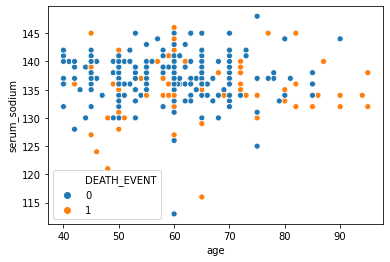

In [93]:
sns.scatterplot(x = df['age'], y= df['serum_sodium'], hue=df['DEATH_EVENT'] )

In [18]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

In [19]:
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df.drop(['DEATH_EVENT'],axis='columns'), df['DEATH_EVENT'])

In [20]:
#Creating a new Oversampling Data Frame
df_oversampled = pd.DataFrame(X)

In [21]:
df_oversampled['DEATH_EVENT'] = y

<AxesSubplot:xlabel='age', ylabel='serum_sodium'>

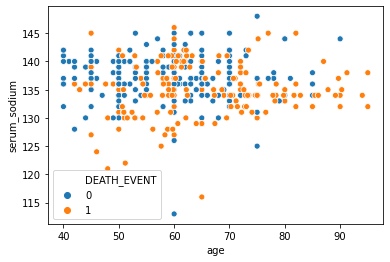

In [94]:
sns.scatterplot(x = df_oversampled['age'], y= df_oversampled['serum_sodium'], hue=y )

In [23]:
df_oversampled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,69.563057,0,164,0,25,0,244491.561227,1.183615,141,0,0,62,1
402,72.734655,1,75,0,43,1,360297.828433,2.640793,132,0,0,25,1
403,51.169940,0,472,0,48,0,80395.959254,1.847168,122,0,0,65,1
404,53.175079,0,1533,1,29,0,73236.067404,1.429180,139,0,0,129,1


Text(0.5, 1.0, 'Count of target variable')

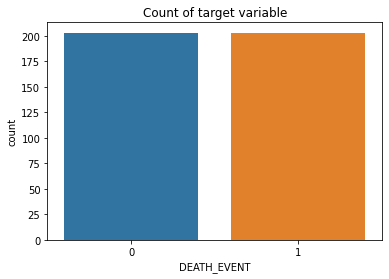

In [24]:
sns.countplot(df_oversampled["DEATH_EVENT"])
plt.title("Count of target variable")

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled.drop(['DEATH_EVENT'],axis='columns'),df_oversampled['DEATH_EVENT'], test_size=0.20)

In [37]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()
df_scaled=pd.DataFrame(sc.fit_transform(df_oversampled.drop("DEATH_EVENT",axis=1)),columns=df_oversampled.drop("DEATH_EVENT",axis=1).columns)

In [59]:
df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.100110,-0.798183,0.011614,-0.733402,-1.411958,1.525736,0.090255,0.384616,-1.414037,0.840168,-0.564076,-1.500482
1,-0.598843,-0.798183,7.930901,-0.733402,0.128360,-0.655422,0.073233,-0.392431,-0.044417,0.840168,-0.564076,-1.474174
2,0.250633,-0.798183,-0.462738,-0.733402,-1.411958,-0.655422,-0.977530,-0.198169,-1.642307,0.840168,1.772811,-1.461019
3,-1.023581,1.252845,-0.500817,-0.733402,-1.411958,-0.655422,-0.479921,0.384616,0.183853,0.840168,-0.564076,-1.461019
4,0.250633,1.252845,-0.447507,1.363508,-1.411958,-0.655422,0.733000,1.161662,-4.609818,-1.190238,-0.564076,-1.447865
...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.638254,-0.798183,-0.443155,-0.733402,-0.984092,-0.655422,-0.122353,-0.311216,1.096933,-1.190238,-0.564076,-0.737524
402,0.907674,1.252845,-0.539984,-0.733402,0.556226,1.525736,1.078194,1.104154,-0.957497,-1.190238,-0.564076,-1.224239
403,-0.924197,-0.798183,-0.108062,-0.733402,0.984092,-0.655422,-1.823507,0.333299,-3.240198,-1.190238,-0.564076,-0.698061
404,-0.753866,-0.798183,1.046267,1.363508,-0.641799,-0.655422,-1.897733,-0.072696,0.640393,-1.190238,-0.564076,0.143824


In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [43]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,20,50],
            "criterion":['gini','entropy'],
            'min_samples_split':[2,3,4],
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20]
        }
    },
 
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    
    'SGD':{
        'model': SGDClassifier(),
        'params':{
            'loss':["hinge","modified_huber","log"],
            'penalty':["l2","l1","elasticnet"]
        }
    },
     
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [x for x in range(5,20)],
            'leaf_size':[10,20,30,40,50,60],
        }
    }  
}

In [84]:
from sklearn.model_selection import GridSearchCV
scores = []

# for model_name, mp in model_params.items():
model_name = 'random_forest'
mp = model_params['random_forest']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})
    
# model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 1/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.908) f1: (test=0.906) precision: (test=0.879) recall: (test=0.935) roc_auc: (test=0.926) total time=   0.0s
[CV 2/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 2/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.877) f1: (test=0.867) precision: (test=0.897) recall: (test=0.839) roc_auc: (test=0.919) total time=   0.0s
[CV 3/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 3/5; 1/24] END criterion=gini, min_samples_split=2, n_estimators=5; accuracy: (test=0.800) f1: (test=0.787) precision: (test=0.800) recall: (test=0.774) roc_auc: (test=0.917) total time=   0.0s
[CV 4/5; 1/24] START criterion=gini, min_samples_split=2, n_estimators=5........
[CV 4/5; 1/24] END c

[CV 2/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.938) f1: (test=0.935) precision: (test=0.935) recall: (test=0.935) roc_auc: (test=0.969) total time=   0.0s
[CV 3/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 3/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.846) f1: (test=0.839) precision: (test=0.839) recall: (test=0.839) roc_auc: (test=0.934) total time=   0.0s
[CV 4/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 4/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.892) f1: (test=0.896) precision: (test=0.833) recall: (test=0.968) roc_auc: (test=0.968) total time=   0.0s
[CV 5/5; 7/24] START criterion=gini, min_samples_split=3, n_estimators=20.......
[CV 5/5; 7/24] END criterion=gini, min_samples_split=3, n_estimators=20; accuracy: (test=0.891) f1: (test=0.885) precision: (test=0.871) recall: (test=0.900) ro

[CV 2/5; 13/24] END criterion=entropy, min_samples_split=2, n_estimators=5; accuracy: (test=0.831) f1: (test=0.814) precision: (test=0.857) recall: (test=0.774) roc_auc: (test=0.922) total time=   0.0s
[CV 3/5; 13/24] START criterion=entropy, min_samples_split=2, n_estimators=5....
[CV 3/5; 13/24] END criterion=entropy, min_samples_split=2, n_estimators=5; accuracy: (test=0.862) f1: (test=0.847) precision: (test=0.893) recall: (test=0.806) roc_auc: (test=0.916) total time=   0.0s
[CV 4/5; 13/24] START criterion=entropy, min_samples_split=2, n_estimators=5....
[CV 4/5; 13/24] END criterion=entropy, min_samples_split=2, n_estimators=5; accuracy: (test=0.877) f1: (test=0.871) precision: (test=0.871) recall: (test=0.871) roc_auc: (test=0.949) total time=   0.0s
[CV 5/5; 13/24] START criterion=entropy, min_samples_split=2, n_estimators=5....
[CV 5/5; 13/24] END criterion=entropy, min_samples_split=2, n_estimators=5; accuracy: (test=0.891) f1: (test=0.881) precision: (test=0.897) recall: (te

[CV 1/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.877) f1: (test=0.875) precision: (test=0.848) recall: (test=0.903) roc_auc: (test=0.936) total time=   0.0s
[CV 2/5; 20/24] START criterion=entropy, min_samples_split=3, n_estimators=50...
[CV 2/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.892) f1: (test=0.881) precision: (test=0.929) recall: (test=0.839) roc_auc: (test=0.973) total time=   0.0s
[CV 3/5; 20/24] START criterion=entropy, min_samples_split=3, n_estimators=50...
[CV 3/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.846) f1: (test=0.839) precision: (test=0.839) recall: (test=0.839) roc_auc: (test=0.937) total time=   0.0s
[CV 4/5; 20/24] START criterion=entropy, min_samples_split=3, n_estimators=50...
[CV 4/5; 20/24] END criterion=entropy, min_samples_split=3, n_estimators=50; accuracy: (test=0.892) f1: (test=0.892) precision: (test=0.853) recall:

In [85]:
model_name = 'logistic_regression'
mp = model_params['logistic_regression']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})
   

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=1.........................................................
[CV 1/5; 1/4] END C=1; accuracy: (test=0.785) f1: (test=0.767) precision: (test=0.793) recall: (test=0.742) roc_auc: (test=0.871) total time=   0.0s
[CV 2/5; 1/4] START C=1.........................................................
[CV 2/5; 1/4] END C=1; accuracy: (test=0.785) f1: (test=0.767) precision: (test=0.793) recall: (test=0.742) roc_auc: (test=0.900) total time=   0.0s
[CV 3/5; 1/4] START C=1.........................................................
[CV 3/5; 1/4] END C=1; accuracy: (test=0.754) f1: (test=0.733) precision: (test=0.759) recall: (test=0.710) roc_auc: (test=0.902) total time=   0.0s
[CV 4/5; 1/4] START C=1.........................................................
[CV 4/5; 1/4] END C=1; accuracy: (test=0.754) f1: (test=0.733) precision: (test=0.759) recall: (test=0.710) roc_auc: (test=0.883) total time=   0.0s
[CV 5/5; 1/4] START 

In [86]:
model_name = 'decision_tree'
mp = model_params['decision_tree']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})
   

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START criterion=gini..............................................
[CV 1/5; 1/2] END criterion=gini; accuracy: (test=0.815) f1: (test=0.818) precision: (test=0.771) recall: (test=0.871) roc_auc: (test=0.818) total time=   0.0s
[CV 2/5; 1/2] START criterion=gini..............................................
[CV 2/5; 1/2] END criterion=gini; accuracy: (test=0.785) f1: (test=0.759) precision: (test=0.815) recall: (test=0.710) roc_auc: (test=0.781) total time=   0.0s
[CV 3/5; 1/2] START criterion=gini..............................................
[CV 3/5; 1/2] END criterion=gini; accuracy: (test=0.815) f1: (test=0.793) precision: (test=0.852) recall: (test=0.742) roc_auc: (test=0.812) total time=   0.0s
[CV 4/5; 1/2] START criterion=gini..............................................
[CV 4/5; 1/2] END criterion=gini; accuracy: (test=0.862) f1: (test=0.862) precision: (test=0.824) recall: (test=0.903) roc_auc: (test=0.

In [31]:
model_name = 'svm'
mp = model_params['svm']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=1, kernel=rbf.............................................
[CV 1/5; 1/6] END ...........................C=1, kernel=rbf; total time=   0.0s
[CV 2/5; 1/6] START C=1, kernel=rbf.............................................
[CV 2/5; 1/6] END ...........................C=1, kernel=rbf; total time=   0.0s
[CV 3/5; 1/6] START C=1, kernel=rbf.............................................
[CV 3/5; 1/6] END ...........................C=1, kernel=rbf; total time=   0.0s
[CV 4/5; 1/6] START C=1, kernel=rbf.............................................
[CV 4/5; 1/6] END ...........................C=1, kernel=rbf; total time=   0.0s
[CV 5/5; 1/6] START C=1, kernel=rbf.............................................
[CV 5/5; 1/6] END ...........................C=1, kernel=rbf; total time=   0.0s
[CV 1/5; 2/6] START C=1, kernel=linear..........................................
[CV 1/5; 2/6] END ........................C=1, ke

In [87]:
model_name = 'KNN'
mp = model_params['KNN']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1,scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 1/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.492) f1: (test=0.421) precision: (test=0.462) recall: (test=0.387) roc_auc: (test=0.528) total time=   0.0s
[CV 2/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 2/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.615) f1: (test=0.658) precision: (test=0.571) recall: (test=0.774) roc_auc: (test=0.644) total time=   0.0s
[CV 3/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 3/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.600) f1: (test=0.606) precision: (test=0.571) recall: (test=0.645) roc_auc: (test=0.638) total time=   0.0s
[CV 4/5; 1/90] START leaf_size=10, n_neighbors=5................................
[CV 4/5; 1/90] END leaf_size=10, n_neighbors=5; accuracy: (test=0.677) f1: (test=0.667) prec

[CV 3/5; 7/90] END leaf_size=10, n_neighbors=11; accuracy: (test=0.615) f1: (test=0.590) precision: (test=0.600) recall: (test=0.581) roc_auc: (test=0.637) total time=   0.0s
[CV 4/5; 7/90] START leaf_size=10, n_neighbors=11...............................
[CV 4/5; 7/90] END leaf_size=10, n_neighbors=11; accuracy: (test=0.569) f1: (test=0.576) precision: (test=0.543) recall: (test=0.613) roc_auc: (test=0.629) total time=   0.0s
[CV 5/5; 7/90] START leaf_size=10, n_neighbors=11...............................
[CV 5/5; 7/90] END leaf_size=10, n_neighbors=11; accuracy: (test=0.625) f1: (test=0.586) precision: (test=0.607) recall: (test=0.567) roc_auc: (test=0.661) total time=   0.0s
[CV 1/5; 8/90] START leaf_size=10, n_neighbors=12...............................
[CV 1/5; 8/90] END leaf_size=10, n_neighbors=12; accuracy: (test=0.508) f1: (test=0.429) precision: (test=0.480) recall: (test=0.387) roc_auc: (test=0.564) total time=   0.0s
[CV 2/5; 8/90] START leaf_size=10, n_neighbors=12........

[CV 1/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.492) f1: (test=0.459) precision: (test=0.467) recall: (test=0.452) roc_auc: (test=0.531) total time=   0.0s
[CV 2/5; 15/90] START leaf_size=10, n_neighbors=19..............................
[CV 2/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.569) f1: (test=0.600) precision: (test=0.538) recall: (test=0.677) roc_auc: (test=0.572) total time=   0.0s
[CV 3/5; 15/90] START leaf_size=10, n_neighbors=19..............................
[CV 3/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.600) f1: (test=0.606) precision: (test=0.571) recall: (test=0.645) roc_auc: (test=0.590) total time=   0.0s
[CV 4/5; 15/90] START leaf_size=10, n_neighbors=19..............................
[CV 4/5; 15/90] END leaf_size=10, n_neighbors=19; accuracy: (test=0.538) f1: (test=0.545) precision: (test=0.514) recall: (test=0.581) roc_auc: (test=0.548) total time=   0.0s
[CV 5/5; 15/90] START leaf_size=10, n_neighbors=19...

[CV 2/5; 23/90] END leaf_size=20, n_neighbors=12; accuracy: (test=0.615) f1: (test=0.638) precision: (test=0.579) recall: (test=0.710) roc_auc: (test=0.627) total time=   0.0s
[CV 3/5; 23/90] START leaf_size=20, n_neighbors=12..............................
[CV 3/5; 23/90] END leaf_size=20, n_neighbors=12; accuracy: (test=0.600) f1: (test=0.519) precision: (test=0.609) recall: (test=0.452) roc_auc: (test=0.648) total time=   0.0s
[CV 4/5; 23/90] START leaf_size=20, n_neighbors=12..............................
[CV 4/5; 23/90] END leaf_size=20, n_neighbors=12; accuracy: (test=0.585) f1: (test=0.542) precision: (test=0.571) recall: (test=0.516) roc_auc: (test=0.632) total time=   0.0s
[CV 5/5; 23/90] START leaf_size=20, n_neighbors=12..............................
[CV 5/5; 23/90] END leaf_size=20, n_neighbors=12; accuracy: (test=0.578) f1: (test=0.400) precision: (test=0.600) recall: (test=0.300) roc_auc: (test=0.670) total time=   0.0s
[CV 1/5; 24/90] START leaf_size=20, n_neighbors=13...

[CV 3/5; 31/90] END leaf_size=30, n_neighbors=5; accuracy: (test=0.600) f1: (test=0.606) precision: (test=0.571) recall: (test=0.645) roc_auc: (test=0.638) total time=   0.0s
[CV 4/5; 31/90] START leaf_size=30, n_neighbors=5...............................
[CV 4/5; 31/90] END leaf_size=30, n_neighbors=5; accuracy: (test=0.677) f1: (test=0.667) precision: (test=0.656) recall: (test=0.677) roc_auc: (test=0.692) total time=   0.0s
[CV 5/5; 31/90] START leaf_size=30, n_neighbors=5...............................
[CV 5/5; 31/90] END leaf_size=30, n_neighbors=5; accuracy: (test=0.641) f1: (test=0.623) precision: (test=0.613) recall: (test=0.633) roc_auc: (test=0.691) total time=   0.0s
[CV 1/5; 32/90] START leaf_size=30, n_neighbors=6...............................
[CV 1/5; 32/90] END leaf_size=30, n_neighbors=6; accuracy: (test=0.508) f1: (test=0.407) precision: (test=0.478) recall: (test=0.355) roc_auc: (test=0.542) total time=   0.0s
[CV 2/5; 32/90] START leaf_size=30, n_neighbors=6........

[CV 4/5; 39/90] END leaf_size=30, n_neighbors=13; accuracy: (test=0.631) f1: (test=0.636) precision: (test=0.600) recall: (test=0.677) roc_auc: (test=0.638) total time=   0.0s
[CV 5/5; 39/90] START leaf_size=30, n_neighbors=13..............................
[CV 5/5; 39/90] END leaf_size=30, n_neighbors=13; accuracy: (test=0.625) f1: (test=0.556) precision: (test=0.625) recall: (test=0.500) roc_auc: (test=0.680) total time=   0.0s
[CV 1/5; 40/90] START leaf_size=30, n_neighbors=14..............................
[CV 1/5; 40/90] END leaf_size=30, n_neighbors=14; accuracy: (test=0.554) f1: (test=0.508) precision: (test=0.536) recall: (test=0.484) roc_auc: (test=0.557) total time=   0.0s
[CV 2/5; 40/90] START leaf_size=30, n_neighbors=14..............................
[CV 2/5; 40/90] END leaf_size=30, n_neighbors=14; accuracy: (test=0.554) f1: (test=0.592) precision: (test=0.525) recall: (test=0.677) roc_auc: (test=0.574) total time=   0.0s
[CV 3/5; 40/90] START leaf_size=30, n_neighbors=14...

[CV 4/5; 47/90] END leaf_size=40, n_neighbors=6; accuracy: (test=0.692) f1: (test=0.643) precision: (test=0.720) recall: (test=0.581) roc_auc: (test=0.695) total time=   0.0s
[CV 5/5; 47/90] START leaf_size=40, n_neighbors=6...............................
[CV 5/5; 47/90] END leaf_size=40, n_neighbors=6; accuracy: (test=0.656) f1: (test=0.577) precision: (test=0.682) recall: (test=0.500) roc_auc: (test=0.676) total time=   0.0s
[CV 1/5; 48/90] START leaf_size=40, n_neighbors=7...............................
[CV 1/5; 48/90] END leaf_size=40, n_neighbors=7; accuracy: (test=0.492) f1: (test=0.441) precision: (test=0.464) recall: (test=0.419) roc_auc: (test=0.537) total time=   0.0s
[CV 2/5; 48/90] START leaf_size=40, n_neighbors=7...............................
[CV 2/5; 48/90] END leaf_size=40, n_neighbors=7; accuracy: (test=0.554) f1: (test=0.623) precision: (test=0.522) recall: (test=0.774) roc_auc: (test=0.613) total time=   0.0s
[CV 3/5; 48/90] START leaf_size=40, n_neighbors=7........

[CV 3/5; 55/90] END leaf_size=40, n_neighbors=14; accuracy: (test=0.631) f1: (test=0.586) precision: (test=0.630) recall: (test=0.548) roc_auc: (test=0.648) total time=   0.0s
[CV 4/5; 55/90] START leaf_size=40, n_neighbors=14..............................
[CV 4/5; 55/90] END leaf_size=40, n_neighbors=14; accuracy: (test=0.569) f1: (test=0.500) precision: (test=0.560) recall: (test=0.452) roc_auc: (test=0.626) total time=   0.0s
[CV 5/5; 55/90] START leaf_size=40, n_neighbors=14..............................
[CV 5/5; 55/90] END leaf_size=40, n_neighbors=14; accuracy: (test=0.578) f1: (test=0.449) precision: (test=0.579) recall: (test=0.367) roc_auc: (test=0.674) total time=   0.0s
[CV 1/5; 56/90] START leaf_size=40, n_neighbors=15..............................
[CV 1/5; 56/90] END leaf_size=40, n_neighbors=15; accuracy: (test=0.538) f1: (test=0.516) precision: (test=0.516) recall: (test=0.516) roc_auc: (test=0.558) total time=   0.0s
[CV 2/5; 56/90] START leaf_size=40, n_neighbors=15...

[CV 4/5; 63/90] END leaf_size=50, n_neighbors=7; accuracy: (test=0.615) f1: (test=0.627) precision: (test=0.583) recall: (test=0.677) roc_auc: (test=0.725) total time=   0.0s
[CV 5/5; 63/90] START leaf_size=50, n_neighbors=7...............................
[CV 5/5; 63/90] END leaf_size=50, n_neighbors=7; accuracy: (test=0.594) f1: (test=0.594) precision: (test=0.559) recall: (test=0.633) roc_auc: (test=0.627) total time=   0.0s
[CV 1/5; 64/90] START leaf_size=50, n_neighbors=8...............................
[CV 1/5; 64/90] END leaf_size=50, n_neighbors=8; accuracy: (test=0.523) f1: (test=0.367) precision: (test=0.500) recall: (test=0.290) roc_auc: (test=0.572) total time=   0.0s
[CV 2/5; 64/90] START leaf_size=50, n_neighbors=8...............................
[CV 2/5; 64/90] END leaf_size=50, n_neighbors=8; accuracy: (test=0.631) f1: (test=0.625) precision: (test=0.606) recall: (test=0.645) roc_auc: (test=0.630) total time=   0.0s
[CV 3/5; 64/90] START leaf_size=50, n_neighbors=8........

[CV 4/5; 71/90] END leaf_size=50, n_neighbors=15; accuracy: (test=0.554) f1: (test=0.540) precision: (test=0.531) recall: (test=0.548) roc_auc: (test=0.615) total time=   0.0s
[CV 5/5; 71/90] START leaf_size=50, n_neighbors=15..............................
[CV 5/5; 71/90] END leaf_size=50, n_neighbors=15; accuracy: (test=0.656) f1: (test=0.607) precision: (test=0.654) recall: (test=0.567) roc_auc: (test=0.682) total time=   0.0s
[CV 1/5; 72/90] START leaf_size=50, n_neighbors=16..............................
[CV 1/5; 72/90] END leaf_size=50, n_neighbors=16; accuracy: (test=0.569) f1: (test=0.517) precision: (test=0.556) recall: (test=0.484) roc_auc: (test=0.547) total time=   0.0s
[CV 2/5; 72/90] START leaf_size=50, n_neighbors=16..............................
[CV 2/5; 72/90] END leaf_size=50, n_neighbors=16; accuracy: (test=0.508) f1: (test=0.529) precision: (test=0.486) recall: (test=0.581) roc_auc: (test=0.522) total time=   0.0s
[CV 3/5; 72/90] START leaf_size=50, n_neighbors=16...

[CV 5/5; 79/90] END leaf_size=60, n_neighbors=8; accuracy: (test=0.531) f1: (test=0.348) precision: (test=0.500) recall: (test=0.267) roc_auc: (test=0.616) total time=   0.0s
[CV 1/5; 80/90] START leaf_size=60, n_neighbors=9...............................
[CV 1/5; 80/90] END leaf_size=60, n_neighbors=9; accuracy: (test=0.538) f1: (test=0.464) precision: (test=0.520) recall: (test=0.419) roc_auc: (test=0.569) total time=   0.0s
[CV 2/5; 80/90] START leaf_size=60, n_neighbors=9...............................
[CV 2/5; 80/90] END leaf_size=60, n_neighbors=9; accuracy: (test=0.554) f1: (test=0.603) precision: (test=0.524) recall: (test=0.710) roc_auc: (test=0.634) total time=   0.0s
[CV 3/5; 80/90] START leaf_size=60, n_neighbors=9...............................
[CV 3/5; 80/90] END leaf_size=60, n_neighbors=9; accuracy: (test=0.600) f1: (test=0.606) precision: (test=0.571) recall: (test=0.645) roc_auc: (test=0.639) total time=   0.0s
[CV 4/5; 80/90] START leaf_size=60, n_neighbors=9........

[CV 5/5; 87/90] END leaf_size=60, n_neighbors=16; accuracy: (test=0.609) f1: (test=0.490) precision: (test=0.632) recall: (test=0.400) roc_auc: (test=0.659) total time=   0.0s
[CV 1/5; 88/90] START leaf_size=60, n_neighbors=17..............................
[CV 1/5; 88/90] END leaf_size=60, n_neighbors=17; accuracy: (test=0.554) f1: (test=0.525) precision: (test=0.533) recall: (test=0.516) roc_auc: (test=0.526) total time=   0.0s
[CV 2/5; 88/90] START leaf_size=60, n_neighbors=17..............................
[CV 2/5; 88/90] END leaf_size=60, n_neighbors=17; accuracy: (test=0.538) f1: (test=0.583) precision: (test=0.512) recall: (test=0.677) roc_auc: (test=0.558) total time=   0.0s
[CV 3/5; 88/90] START leaf_size=60, n_neighbors=17..............................
[CV 3/5; 88/90] END leaf_size=60, n_neighbors=17; accuracy: (test=0.569) f1: (test=0.548) precision: (test=0.548) recall: (test=0.548) roc_auc: (test=0.623) total time=   0.0s
[CV 4/5; 88/90] START leaf_size=60, n_neighbors=17...

In [88]:
model_name = 'SGD'
mp = model_params['SGD']
clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,verbose=10,n_jobs=1, scoring=['roc_auc','accuracy','precision','recall','f1'], refit='f1')
clf.fit(X_train, y_train)
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 1/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.538) total time=   0.0s
[CV 2/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 2/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.477) f1: (test=0.646) precision: (test=0.477) recall: (test=1.000) roc_auc: (test=0.380) total time=   0.0s
[CV 3/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 3/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.546) total time=   0.0s
[CV 4/5; 1/9] START loss=hinge, penalty=l2......................................
[CV 4/5; 1/9] END loss=hinge, penalty=l2; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precis

[CV 4/5; 3/9] END loss=hinge, penalty=elasticnet; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.575) total time=   0.0s
[CV 5/5; 3/9] START loss=hinge, penalty=elasticnet..............................
[CV 5/5; 3/9] END loss=hinge, penalty=elasticnet; accuracy: (test=0.531) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.516) total time=   0.0s
[CV 1/5; 4/9] START loss=modified_huber, penalty=l2.............................
[CV 1/5; 4/9] END loss=modified_huber, penalty=l2; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.538) total time=   0.0s
[CV 2/5; 4/9] START loss=modified_huber, penalty=l2.............................
[CV 2/5; 4/9] END loss=modified_huber, penalty=l2; accuracy: (test=0.477) f1: (test=0.646) precision: (test=0.477) recall: (test=1.000) roc_auc: (test=0.380) total time=   0.0s
[CV 3/5; 4/9] START loss=modified_huber, penalty=l2

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precis

[CV 4/5; 6/9] END loss=modified_huber, penalty=elasticnet; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.568) total time=   0.0s
[CV 5/5; 6/9] START loss=modified_huber, penalty=elasticnet.....................
[CV 5/5; 6/9] END loss=modified_huber, penalty=elasticnet; accuracy: (test=0.531) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.516) total time=   0.0s
[CV 1/5; 7/9] START loss=log, penalty=l2........................................
[CV 1/5; 7/9] END loss=log, penalty=l2; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.538) total time=   0.0s
[CV 2/5; 7/9] START loss=log, penalty=l2........................................
[CV 2/5; 7/9] END loss=log, penalty=l2; accuracy: (test=0.477) f1: (test=0.646) precision: (test=0.477) recall: (test=1.000) roc_auc: (test=0.380) total time=   0.0s
[CV 3/5; 7/9] START loss=log, penalty=l2...............

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precis

[CV 4/5; 9/9] END loss=log, penalty=elasticnet; accuracy: (test=0.523) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.565) total time=   0.0s
[CV 5/5; 9/9] START loss=log, penalty=elasticnet................................
[CV 5/5; 9/9] END loss=log, penalty=elasticnet; accuracy: (test=0.469) f1: (test=0.638) precision: (test=0.469) recall: (test=1.000) roc_auc: (test=0.480) total time=   0.0s


In [81]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [90]:
model_results = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [91]:
model_results

,model,best_score,best_params
0,random_forest,0.890257,"{'criterion': 'entropy', 'min_samples_split': ..."
1,logistic_regression,0.751014,{'C': 5}
2,decision_tree,0.818349,{'criterion': 'entropy'}
3,KNN,0.594853,"{'leaf_size': 10, 'n_neighbors': 5}"
4,SGD,0.399265,"{'loss': 'log', 'penalty': 'l1'}"
